In [46]:
# This program predicts stock prices by using machine learning models

#Install the dependencies
import quandl
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import array

In [47]:
#Get the stock data
df = quandl.get("WIKI/FB")
# Take a look at the data
print(df.head())

             Open   High    Low    Close       Volume  Ex-Dividend  \
Date                                                                 
2012-05-18  42.05  45.00  38.00  38.2318  573576400.0          0.0   
2012-05-21  36.53  36.66  33.00  34.0300  168192700.0          0.0   
2012-05-22  32.61  33.59  30.94  31.0000  101786600.0          0.0   
2012-05-23  31.37  32.50  31.36  32.0000   73600000.0          0.0   
2012-05-24  32.95  33.21  31.77  33.0300   50237200.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2012-05-18          1.0      42.05      45.00     38.00     38.2318   
2012-05-21          1.0      36.53      36.66     33.00     34.0300   
2012-05-22          1.0      32.61      33.59     30.94     31.0000   
2012-05-23          1.0      31.37      32.50     31.36     32.0000   
2012-05-24          1.0      32.95      33.21     31.77     33.0300   

           

In [48]:
# Get the Adjusted Close Price
df = df[['Adj. Close']]
#Take a look at the new data
print(df.head())

            Adj. Close
Date                  
2012-05-18     38.2318
2012-05-21     34.0300
2012-05-22     31.0000
2012-05-23     32.0000
2012-05-24     33.0300


In [49]:
# A variable for predicting 'n' days out into the future
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21      169.39         NaN
2018-03-22      164.89         NaN
2018-03-23      159.39         NaN
2018-03-26      160.06         NaN
2018-03-27      152.19         NaN


In [50]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [171.5499]
 [175.98  ]
 [176.41  ]]


In [51]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)

[ 30.771  31.2    31.47  ... 159.39  160.06  152.19 ]


In [52]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9825573030511366


In [55]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9829379738456094


In [57]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[173.15]
 [179.52]
 [179.96]
 [177.36]
 [176.01]
 [177.91]
 [178.99]
 [183.29]
 [184.93]
 [181.46]
 [178.32]
 [175.94]
 [176.62]
 [180.4 ]
 [179.78]
 [183.71]
 [182.34]
 [185.23]
 [184.76]
 [181.88]
 [184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


In [58]:
# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[176.9140226  183.33935734 183.78317952 181.16059391 179.79886677
 181.71537164 182.80475335 187.14210647 188.79635278 185.29620968
 182.12893321 179.72825869 180.4141657  184.2270017  183.6016159
 187.56575492 186.18385404 189.09895881 188.62487603 185.71985812
 188.04992457 187.71705793 188.95774266 176.3188974  171.87058874
 173.12136033 168.58226986 163.03449261 163.71031275 155.77194785]
[174.76062528 179.05704024 178.24350066 175.22716595 175.02968407
 177.11442098 179.62082515 186.59900787 179.4925104  181.93598847
 178.55317872 175.13293646 174.34812836 177.9432396  178.55953314
 184.42519295 186.9794699  179.63488369 179.67901617 184.6417288
 181.69764244 183.54417365 179.49766897 175.96768213 172.95537789
 172.6732365  172.24732789 167.8319844  166.95049991 161.96714387]


In [59]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [60]:
x

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

Text(0.5, 1.0, 'Stock Market Predictor')

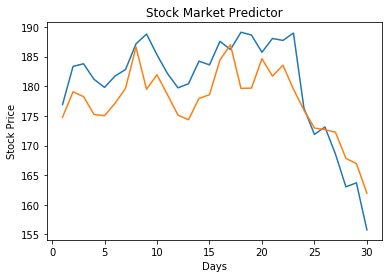

In [63]:
plt.plot(x, lr_prediction)
plt.plot(x, svm_prediction)
plt.xlabel('Days') 
plt.ylabel('Stock Price')
plt.title('Stock Market Predictor')